## 2024 Week 8 - Prep Air Loyalty
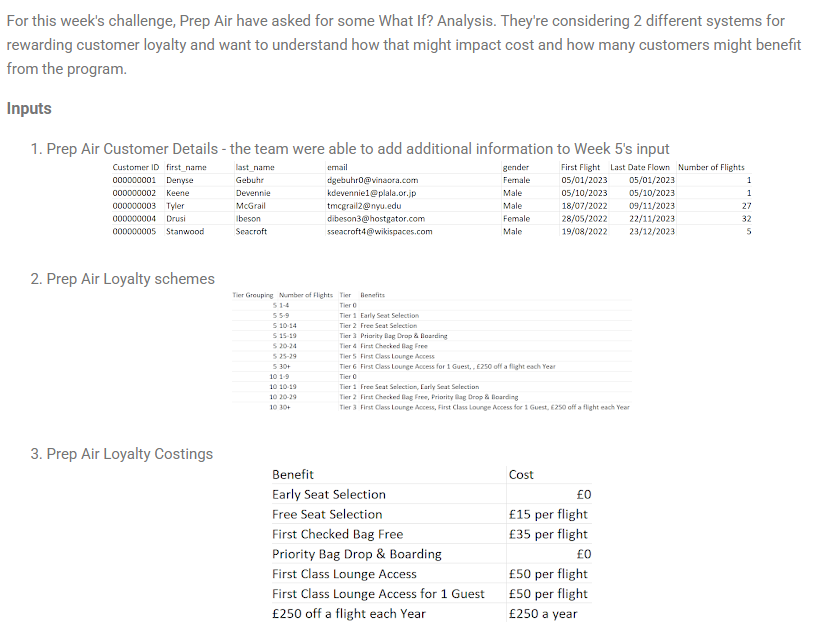
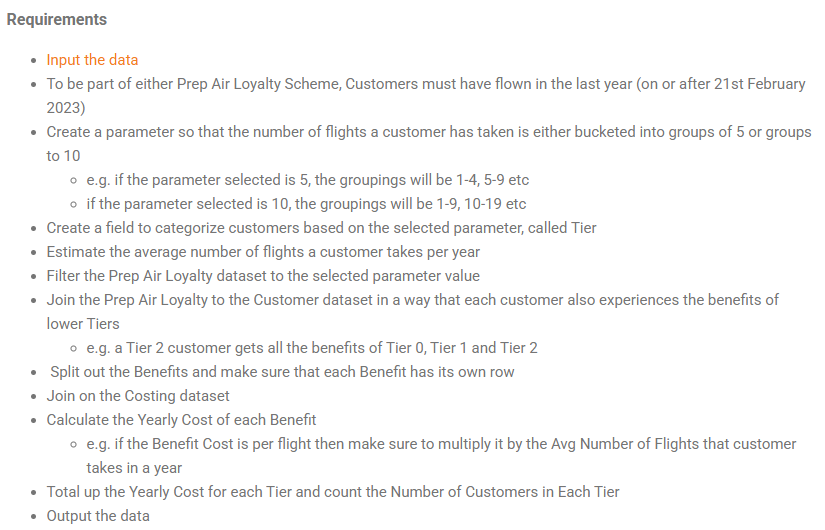

In [1558]:
import pandas as pd
import numpy as np

In [1559]:
loyalty = pd.read_excel('./data/Prep Air Loyalty.xlsx', sheet_name=None)
customers = pd.read_csv('./data/Prep Air Updated Customers.csv')

In [1560]:
customers_loyalty = loyalty['Prep Air Loyalty']
loyalty_costings = loyalty['Costings']

In [1561]:
customers.head()

Customer ID first_name last_name                      email  gender  \
0            1     Denyse    Gebuhr       dgebuhr0@vinaora.com  Female   
1            2      Keene  Devennie     kdevennie1@plala.or.jp    Male   
2            3      Tyler   McGrail          tmcgrail2@nyu.edu    Male   
3            4      Drusi    Ibeson     dibeson3@hostgator.com  Female   
4            5   Stanwood  Seacroft  sseacroft4@wikispaces.com    Male   

  First Flight Last Date Flown  Number of Flights  
0   2023-01-05      2023-01-05                  1  
1   2023-10-05      2023-10-05                  1  
2   2022-07-18      2023-11-09                 27  
3   2022-05-28      2023-11-22                 32  
4   2022-08-19      2023-12-23                  5

In [1562]:
customers_loyalty

Tier Grouping Number of Flights    Tier  \
0               5               1-4  Tier 0   
1               5               5-9  Tier 1   
2               5             10-14  Tier 2   
3               5             15-19  Tier 3   
4               5             20-24  Tier 4   
5               5             25-29  Tier 5   
6               5               30+  Tier 6   
7              10               1-9  Tier 0   
8              10             10-19  Tier 1   
9              10             20-29  Tier 2   
10             10               30+  Tier 3   

                                             Benefits  
0                                                 NaN  
1                                Early Seat Selection  
2                                 Free Seat Selection  
3                        Priority Bag Drop & Boarding  
4                              First Checked Bag Free  
5                           First Class Lounge Access  
6   First Class Lounge Access for 1 Guest, , £250 ...  
7                                                 NaN  
8           Free Seat Selection, Early Seat Selection  
9   First Checked Bag Free, Priority Bag Drop & Bo...  
10  First Class Lounge Access, First Class Lounge ...

In [1563]:
loyalty_costings

Benefit            Cost
0                   Early Seat Selection               0
1                    Free Seat Selection  £15 per flight
2                 First Checked Bag Free  £35 per flight
3           Priority Bag Drop & Boarding               0
4              First Class Lounge Access  £50 per flight
5  First Class Lounge Access for 1 Guest  £50 per flight
6            £250 off a flight each Year     £250 a year

##### To be part of either Prep Air Loyalty Scheme, Customers must have flown in the last year (on or after 21st February 2023)


In [1565]:
customers['First Flight'] = pd.to_datetime(customers['First Flight'])
customers['Last Date Flown'] = pd.to_datetime(customers['Last Date Flown'])

In [1566]:
loyal_customers = customers[customers['Last Date Flown'] >= '2023-02-21'].copy()

#### Create a parameter so that the number of flights a customer has taken is either bucketed into groups of 5 or groups to 10
- e.g. if the parameter selected is 5, the groupings will be 1-4, 5-9 etc
- if the parameter selected is 10, the groupings will be 1-9, 10-19 etc
#### Create a field to categorize customers based on the selected parameter, called Tier


In [1568]:
loyal_customers['Number of Flights'].describe()

count    8853.000000
mean       14.440642
std         9.987883
min         1.000000
25%         5.000000
50%        14.000000
75%        23.000000
max        32.000000
Name: Number of Flights, dtype: float64

In [1569]:
customers_loyalty['Number of Flights'].unique()

array(['1-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30+', '1-9',
       '10-19', '20-29'], dtype=object)

In [1570]:
bins = [1, 5, 10, 15, 20, 25, 30, float('inf')]
Tiers = np.arange(0, 7)
loyal_customers['Tier'] = pd.cut(loyal_customers['Number of Flights'], bins, labels=Tiers, include_lowest=True, right=False)
loyal_customers['Tier'].value_counts()

Tier
0    2089
1    1238
5    1238
3    1220
2    1217
4    1170
6     681
Name: count, dtype: int64

#### Estimate the average number of flights a customer takes per year 

In [1572]:
# calculating the number of years they have been a customer
customers_years = ((loyal_customers['Last Date Flown'].dt.year - loyal_customers['First Flight'].dt.year) + 1)

loyal_customers['Avg Flights per Year'] = (loyal_customers['Number of Flights'] / customers_years).round(2)
loyal_customers = loyal_customers[loyal_customers['Avg Flights per Year'] != float('inf')]
loyal_customers.drop(['first_name',	'last_name', 'email', 'gender'], axis=1, inplace=True)


In [1573]:
loyal_customers.head(10)

Customer ID First Flight Last Date Flown  Number of Flights Tier  \
1             2   2023-10-05      2023-10-05                  1    0   
2             3   2022-07-18      2023-11-09                 27    5   
3             4   2022-05-28      2023-11-22                 32    6   
4             5   2022-08-19      2023-12-23                  5    1   
5             6   2023-02-28      2023-02-28                  1    0   
7             8   2022-12-27      2023-07-02                  9    1   
8             9   2023-06-05      2023-06-05                  1    0   
9            10   2023-06-14      2023-09-01                  2    0   
10           11   2022-09-03      2023-08-23                 24    4   
11           12   2023-07-20      2023-09-11                 16    3   

    Avg Flights per Year  
1                    1.0  
2                   13.5  
3                   16.0  
4                    2.5  
5                    1.0  
7                    4.5  
8                    1.0  
9                    2.0  
10                  12.0  
11                  16.0

In [1574]:
loyal_customers[loyal_customers['Customer ID']==8]

Customer ID First Flight Last Date Flown  Number of Flights Tier  \
7            8   2022-12-27      2023-07-02                  9    1   

   Avg Flights per Year  
7                   4.5

#### Filter the Prep Air Loyalty dataset to the selected parameter value
We select the parameter value to be 5

In [1576]:
customers_loyalty = customers_loyalty[customers_loyalty['Tier Grouping'] == 5].copy()


In [1577]:
customers_loyalty.Tier = customers_loyalty.Tier.str.extract(r'(\d+)')
customers_loyalty.Tier = customers_loyalty.Tier.astype(np.int32)

loyal_customers.Tier = loyal_customers.Tier.astype(np.int32)

#### Join the Prep Air Loyalty to the Customer dataset in a way that each customer also experiences the benefits of lower Tiers
e.g. a Tier 2 customer gets all the benefits of Tier 0, Tier 1 and Tier 2 

In [1579]:
# cross join
df = loyal_customers.assign(key=1).merge(customers_loyalty.assign(key=1), on='key').drop('key', axis=1)

# Get the data where the Tier from the Customers table is >= Tier from the Loyalty table. 
df = df.query("Tier_x >= Tier_y")
df[df['Customer ID']==3]

Customer ID First Flight Last Date Flown  Number of Flights_x  Tier_x  \
7             3   2022-07-18      2023-11-09                   27       5   
8             3   2022-07-18      2023-11-09                   27       5   
9             3   2022-07-18      2023-11-09                   27       5   
10            3   2022-07-18      2023-11-09                   27       5   
11            3   2022-07-18      2023-11-09                   27       5   
12            3   2022-07-18      2023-11-09                   27       5   

    Avg Flights per Year  Tier Grouping Number of Flights_y  Tier_y  \
7                   13.5              5                 1-4       0   
8                   13.5              5                 5-9       1   
9                   13.5              5               10-14       2   
10                  13.5              5               15-19       3   
11                  13.5              5               20-24       4   
12                  13.5              5               25-29       5   

                        Benefits  
7                            NaN  
8           Early Seat Selection  
9            Free Seat Selection  
10  Priority Bag Drop & Boarding  
11        First Checked Bag Free  
12     First Class Lounge Access

In [1580]:
df.columns

Index(['Customer ID', 'First Flight', 'Last Date Flown', 'Number of Flights_x',
       'Tier_x', 'Avg Flights per Year', 'Tier Grouping',
       'Number of Flights_y', 'Tier_y', 'Benefits'],
      dtype='object')

In [1581]:
cols = ['Tier_x', 'Benefits', 'Avg Flights per Year', 'Customer ID', 'First Flight', 'Last Date Flown', 'Number of Flights_y']
df = df[cols]
df.head()

Tier_x                      Benefits  Avg Flights per Year  Customer ID  \
0        0                           NaN                   1.0            2   
7        5                           NaN                  13.5            3   
8        5          Early Seat Selection                  13.5            3   
9        5           Free Seat Selection                  13.5            3   
10       5  Priority Bag Drop & Boarding                  13.5            3   

   First Flight Last Date Flown Number of Flights_y  
0    2023-10-05      2023-10-05                 1-4  
7    2022-07-18      2023-11-09                 1-4  
8    2022-07-18      2023-11-09                 5-9  
9    2022-07-18      2023-11-09               10-14  
10   2022-07-18      2023-11-09               15-19

####  Split out the Benefits and make sure that each Benefit has its own row


In [1583]:
mult_benefits = df[(df.Benefits.str.contains(',') == True)]

In [1584]:
mult_benefits.Benefits.unique()

array(['First Class Lounge Access for 1 Guest, , £250 off a flight each Year'],
      dtype=object)

In [1585]:
df1 = mult_benefits.copy()
df2 = mult_benefits.copy()

df1.Benefits = df1.Benefits.apply(lambda x: x.split(', , ')[0].strip())
df2.Benefits = df2.Benefits.apply(lambda x: x.split(', , ')[1].strip())

In [1586]:
df2.head()

Tier_x                     Benefits  Avg Flights per Year  Customer ID  \
20        6  £250 off a flight each Year                  16.0            4   
195       6  £250 off a flight each Year                  32.0           34   
237       6  £250 off a flight each Year                  30.0           41   
440       6  £250 off a flight each Year                  15.0           81   
454       6  £250 off a flight each Year                  15.5           83   

    First Flight Last Date Flown Number of Flights_y  
20    2022-05-28      2023-11-22                 30+  
195   2023-08-08      2023-11-23                 30+  
237   2023-04-07      2023-10-11                 30+  
440   2022-04-16      2023-12-21                 30+  
454   2022-12-22      2023-04-04                 30+

In [1587]:
df = pd.concat((df, new_rows))
df = df.drop(mult_benefits.index, axis=0)

#### Join on the Costing dataset

In [1589]:
df_costs = pd.merge(left=df, right=loyalty_costings, left_on='Benefits', right_on='Benefit', how='inner')
df_costs.head()

Tier_x                      Benefits  Avg Flights per Year  Customer ID  \
0       5          Early Seat Selection                  13.5            3   
1       5           Free Seat Selection                  13.5            3   
2       5  Priority Bag Drop & Boarding                  13.5            3   
3       5        First Checked Bag Free                  13.5            3   
4       5     First Class Lounge Access                  13.5            3   

  First Flight Last Date Flown Number of Flights_y  \
0   2022-07-18      2023-11-09                 5-9   
1   2022-07-18      2023-11-09               10-14   
2   2022-07-18      2023-11-09               15-19   
3   2022-07-18      2023-11-09               20-24   
4   2022-07-18      2023-11-09               25-29   

                        Benefit            Cost  
0          Early Seat Selection               0  
1           Free Seat Selection  £15 per flight  
2  Priority Bag Drop & Boarding               0  
3        First Checked Bag Free  £35 per flight  
4     First Class Lounge Access  £50 per flight

#### Calculate the Yearly Cost of each Benefit
e.g. if the Benefit Cost is per flight then make sure to multiply it by the Avg Number of Flights that customer takes in a year

In [1591]:
df_costs.Cost.unique()

array([0, '£15 per flight', '£35 per flight', '£50 per flight'],
      dtype=object)

In [1592]:
df_costs.Cost = df_costs.Cost.str.extract(r'(\d+)').fillna(0).astype(float)

df_costs['Yearly Cost'] = df_costs.Cost * df_costs['Avg Flights per Year']

#### Total up the Yearly Cost for each Tier and count the Number of Customers in Each Tier

In [1594]:
df_costs.groupby(['Tier_x']).agg(total_yearly_cost=('Yearly Cost', 'sum'), customers_count = ('Customer ID', 'nunique'))

total_yearly_cost  customers_count
Tier_x                                    
1                     0.0             1238
2                137434.2             1217
3                192778.8             1220
4                799838.5             1170
5               2082169.0             1238
6               1287799.0              681